1. Load and Explore the Dataset

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# Basic info
print(df.shape)
df.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


2. Visualize Target Distribution

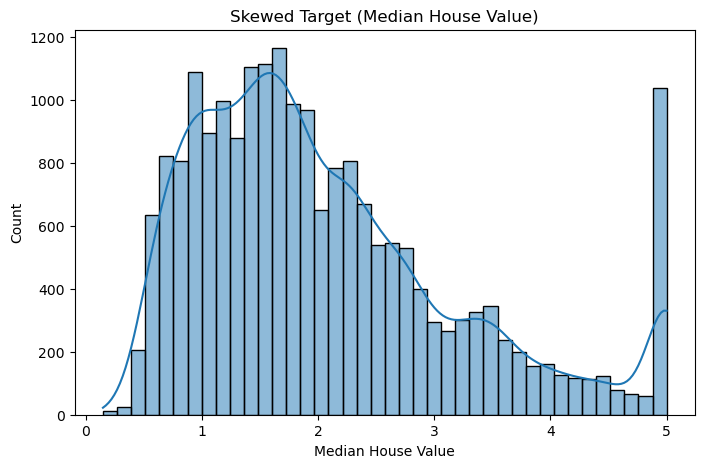

In [17]:
# Skewed Target
plt.figure(figsize=(8, 5))
sns.histplot(df['MedHouseVal'], kde=True, bins=40)
plt.title("Skewed Target (Median House Value)")
plt.xlabel("Median House Value")
plt.ylabel("Count")
plt.savefig("skewed_target_distribution.png")  # 💾 Save
plt.show()

3. Log-Transform the Skewed Target

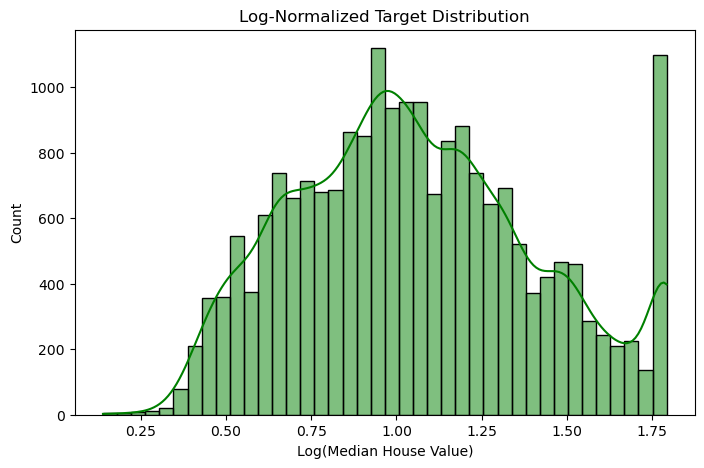

In [18]:
# Normalized Target
plt.figure(figsize=(8, 5))
sns.histplot(df['Log_MedHouseVal'], kde=True, bins=40, color='green')
plt.title("Log-Normalized Target Distribution")
plt.xlabel("Log(Median House Value)")
plt.ylabel("Count")
plt.savefig("normalized_target_distribution.png")  # 💾 Save
plt.show()

4. Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['MedHouseVal', 'Log_MedHouseVal'], axis=1)
y = df['Log_MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 5. Train Multiple Regressors

( I ) Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

( II ) Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

( III ) XGBoost

In [10]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.5 MB/s eta 0:00:00


In [11]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

6. Evaluate the Models

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    print("R2 Score      :", r2_score(y_true, y_pred))
    print("MAE           :", mean_absolute_error(y_true, y_pred))
    print("MSE           :", mean_squared_error(y_true, y_pred))
    print("RMSE          :", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate(y_test, lr_preds, "Linear Regression")
evaluate(y_test, rf_preds, "Random Forest")
evaluate(y_test, xgb_preds, "XGBoost")


Linear Regression Evaluation:
R2 Score      : 0.6006159722803464
MAE           : 0.1678733137053335
MSE           : 0.05034011172872023
RMSE          : 0.22436602177852205

Random Forest Evaluation:
R2 Score      : 0.8254530490272286
MAE           : 0.10145992490232325
MSE           : 0.022000662029590647
RMSE          : 0.14832620142641909

XGBoost Evaluation:
R2 Score      : 0.8397880194779351
MAE           : 0.09948870892300414
MSE           : 0.020193819582143026
RMSE          : 0.14210495973801557


7. Correlation Heatmap

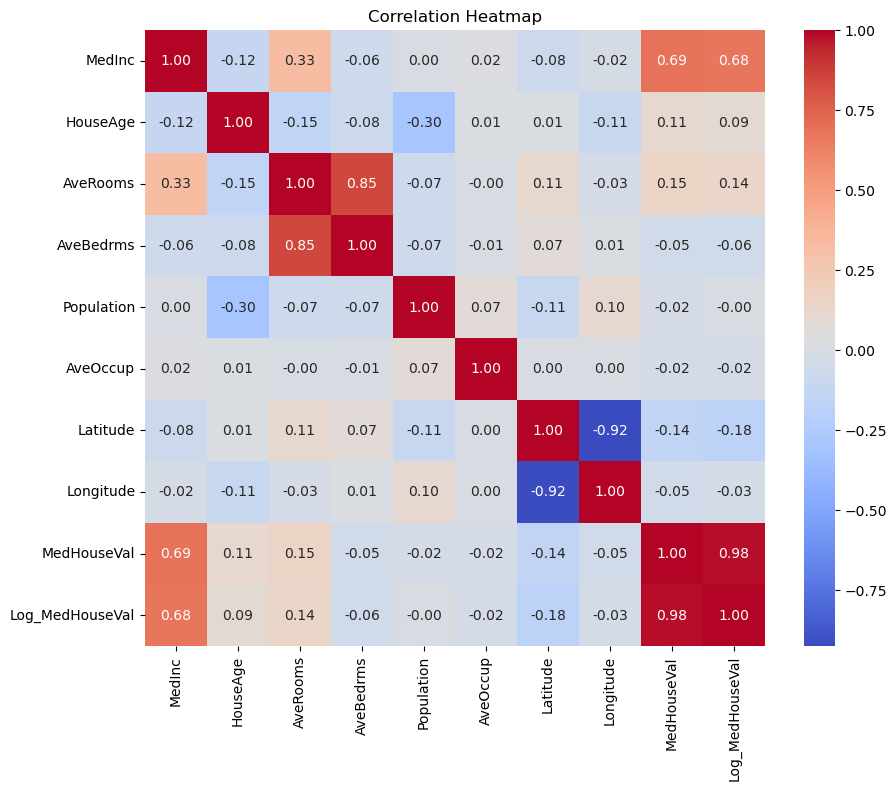

In [19]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

8. Top Feature Importance (from Random Forest)

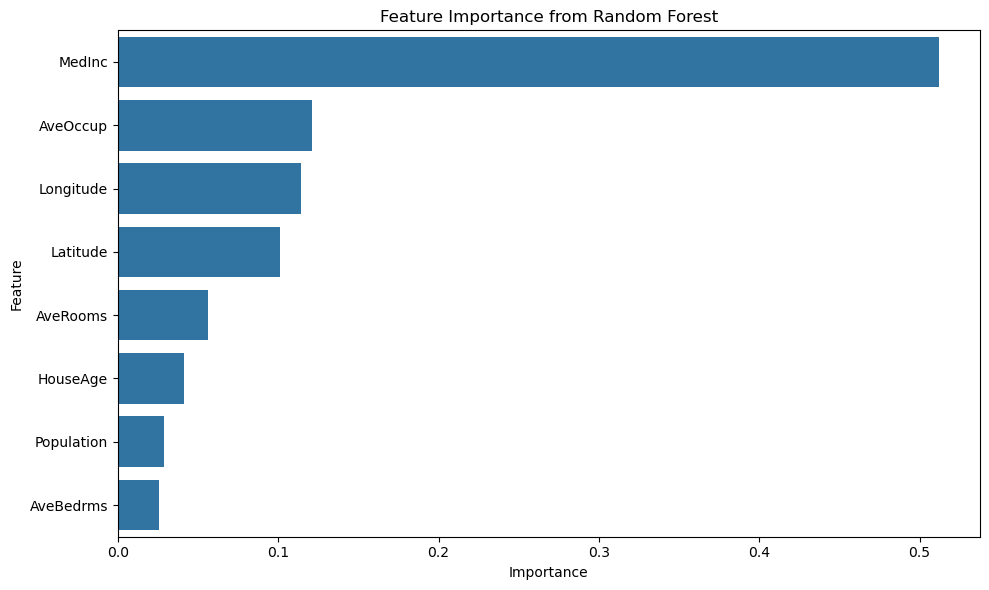

In [20]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort and plot
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.savefig("random_forest_feature_importance.png")
plt.show()

7. Save Best Model

In [21]:
import joblib
joblib.dump(xgb, "best_regression_model.pkl")

['best_regression_model.pkl']